<a href="https://colab.research.google.com/github/rmahesh6386/DataScience_Python/blob/main/Emotion_mining_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import matplotlib.pyplot as plt
import requests
import re
from bs4 import BeautifulSoup as bs
import nltk
import os

In [56]:
#Extracting the review
shoes_reviews = []
for i in range(1,30):
    shoes = []
    url = 'https://www.amazon.in/Apple-MacBook-Air-13-3-inch-Integrated/product-reviews/B073Q5R6VR/ref=cm_cr_arp_d_paging_btm_2?showViewpoints=1&pageNumber="+str(i)'+str(i)
response = requests.get(url)
soup=bs(response.content, 'html.parser')
reviews=soup.find_all("span", {"data-hook":"review-body"})
for i in range(len(reviews)):
    shoes.append(reviews[i].text)
    shoes_reviews = shoes_reviews+shoes

In [57]:
#Saving the extracted data
with open ('shoes.txt', "w", encoding='utf8') as output:
    output.write(str(shoes_reviews))

In [58]:
#Joining all the reviews into a single paragraph
shoes_rev_str = ' '.join(shoes_reviews)
shoes_rev_str

'\nIt\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n \nIt\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n \nWe buy macbook\'s expecting that it will lasts at least 3 years, not in my case they are saying it will costs 46000rs to repair.. i bought this in 58000rs.. if i don\'t want to repair it still I\'ve to pay 2500rs as diagnostic cost.. not recommended..\n \nIt\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n \nWe buy macbook\'s expecting that it will lasts at least 3 years, not in my case they are saying it will costs 46000rs to repair.. i bought this in 58000rs.. if i don\'t want to repair it still I\'ve to pay 2500rs as diagnostic cost.. not recommended..\n \nBest Laptop under 60k. If you don\'t want any accounting softwares like tally or busy then go for it, better than windows in every term. I just love it\'s battery life with sleek look 😍Now talking about 

In [59]:
#Removing unwanted symbols
shoes_rev_str = re.sub("[^A-Za-z" "]+"," ",shoes_rev_str).lower()
shoes_rev_str = re.sub("[0-9" "]+"," ", shoes_rev_str)

In [60]:
#Splitting the words into individual strings
shoes_reviews_words = shoes_rev_str.split(" ")

In [61]:
#Removing the stopwords
from nltk.corpus import stopwords
stop_words=stopwords.words('english')

In [62]:
with open("stop.txt", "r") as sw:
    stopwords = sw.read()

In [63]:
shoes_reviews_words = [w for w in shoes_reviews_words if not w in stopwords]
shoes_rev_str = ' '.join(shoes_reviews_words)  

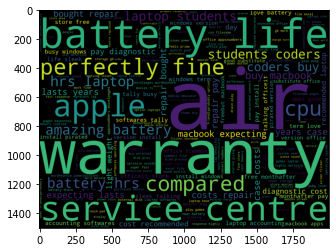

In [64]:
#Creating the wordcloud
from wordcloud import WordCloud
wordcloud_shoes=WordCloud(background_color="black", width=2000, height=1500).generate(shoes_rev_str)
plt.imshow(wordcloud_shoes)

In [65]:
#Extracting the positive words from wordcloud
with open("positive-words.txt") as pos:
    positive_words=pos.read().split('\n')
    positive_words=positive_words[36:]

In [66]:
shoes_positive = " ".join([w for w in shoes_reviews_words if w in positive_words])

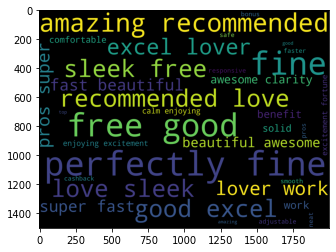

In [67]:
#Positive wordcloud
wordcloud_positive=WordCloud(background_color="black", width=2000, height=1500).generate(shoes_positive)
plt.imshow(wordcloud_positive)

In [70]:
#Extracting the negative words from wordcloud
with open("negative-words.txt",encoding = "ISO-8859-1") as neg:
    negative_words=neg.read().split("\n")
    negative_words=negative_words[37:]

In [71]:
shoes_negative = " ".join([w for w in shoes_reviews_words if w in negative_words])

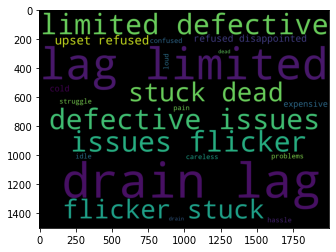

In [72]:
#Negative wordcloud
wordcloud_negative=WordCloud(background_color="black",width=2000,height=1500).generate(shoes_negative)
plt.imshow(wordcloud_negative)